In [336]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('./P1-SuperStoreUS-2015 (1).xlsx')
df = df.loc[99:1599]

In [337]:
df.rename(columns={'Unit Price':'unitprice', 'Shipping Cost':'shipcost',
                   'Ship Mode':'shipmode', 'Customer Segment':'customerseg',
                   'Product Category':'PCate', 'Product Container':'PCon',
                   'Quantity ordered new':'Quantity'},
                   inplace=True)


In [338]:
df['IsProfit'] = ['YES' if x > 0 else 'NO' for x in df['Profit']]
df['IsProfit'].head()

99      NO
100     NO
101     NO
102    YES
103    YES
Name: IsProfit, dtype: object

In [339]:
df = df[['Discount', 'unitprice', 'shipcost', 'shipmode', 'customerseg', 'PCate', 'PCon', 'Region', 'Quantity', 'Sales', 'IsProfit']]


In [340]:
dfPcate = pd.get_dummies(df.PCate, prefix='PCate') 
dfPcate = dfPcate.astype(int)
df.drop('PCate', inplace=True, axis=1)
df = pd.concat([df, dfPcate], axis=1)


In [341]:
dfcustomerseg = pd.get_dummies(df.customerseg, prefix='customerseg') 
dfcustomerseg = dfcustomerseg.astype(int)
df.drop('customerseg', inplace=True, axis=1)
df = pd.concat([df, dfcustomerseg], axis=1)

In [342]:
dfPCon = pd.get_dummies(df.PCon, prefix='PCon') 
dfPCon = dfPCon.astype(int)
df.drop('PCon', inplace=True, axis=1)
df = pd.concat([df, dfPCon], axis=1)

In [343]:
dfRegion = pd.get_dummies(df.Region, prefix='Region') 
dfRegion = dfRegion.astype(int)
df.drop('Region', inplace=True, axis=1)
df = pd.concat([df, dfRegion], axis=1)

In [344]:
dfshipmode = pd.get_dummies(df.shipmode, prefix='shipmode') # True: 1 False: 0
dfshipmode = dfshipmode.astype(int)
df.drop('shipmode', inplace=True, axis=1)
df = pd.concat([df, dfshipmode], axis=1)

In [345]:
IsProfit=pd.get_dummies(df['IsProfit'], drop_first=True)
df.drop('IsProfit',axis=1,inplace=True)
df=pd.concat([df, IsProfit],axis=1)

In [346]:
df['YES'] = df['YES'].astype(int)

In [347]:
df.head(5)

,Discount,unitprice,shipcost,Quantity,Sales,PCate_Furniture,PCate_Office Supplies,PCate_Technology,customerseg_Consumer,customerseg_Corporate,...,PCon_Small Pack,PCon_Wrap Bag,Region_Central,Region_East,Region_South,Region_West,shipmode_Delivery Truck,shipmode_Express Air,shipmode_Regular Air,YES
99,0.02,49.99,19.99,18,901.81,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
100,0.07,1.68,1.57,116,186.59,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
101,0.02,49.99,19.99,5,250.50,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
102,0.07,10.06,2.06,23,221.24,0,1,0,0,1,...,0,1,1,0,0,0,0,0,1,1
103,0.07,1.68,1.57,29,46.65,0,1,0,0,1,...,0,1,1,0,0,0,0,0,1,1


In [348]:
x=df[['Discount','unitprice','shipcost', 'Quantity', 'Sales', 'PCate_Furniture', 'PCate_Office Supplies',
      'PCate_Technology', 'customerseg_Consumer', 'customerseg_Corporate', 'customerseg_Home Office', 'customerseg_Small Business',
      'PCon_Jumbo Box', 'PCon_Jumbo Drum', 'PCon_Large Box', 'PCon_Medium Box', 'PCon_Small Box', 'PCon_Small Pack',
      'PCon_Wrap Bag', 'Region_Central', 'Region_East', 'Region_South', 'Region_West', 'shipmode_Delivery Truck',
      'shipmode_Express Air', 'shipmode_Regular Air']].values # Input: Đặt trưng(feature)
y=df[['YES']].values # Output: Mục tiêu (target)

In [349]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=16)

In [350]:
# Features -> model -> target
#Model: chọn Logictic Regression

from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(max_iter=10000, penalty='l2', solver='liblinear')
model = LogisticRegression(max_iter=10000, penalty='l2', solver='lbfgs')
# model = LogisticRegression(max_iter=10000, penalty='l2', solver='newton-cg')
# model = LogisticRegression(max_iter=10000, penalty='l2', solver='newton-cholesky')
# model = LogisticRegression(max_iter=10000, penalty='l2', solver='sag')
# model = LogisticRegression(max_iter=10000, penalty='l2', solver='saga')

model.fit(X_train, y_train.flatten())

LogisticRegression(max_iter=10000)

In [351]:
X_test.shape

(301, 26)

In [352]:
#Default threshold is 0.5
y_test_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)
y_test_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1]

In [353]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.6777408637873754

In [354]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_pred)

0.6683333333333333

In [355]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])


In [356]:
#  Đối với AUC,sử dụng hàm python roc_auc_score() cho ROC
lotgit_roc_auc1 = roc_auc_score(y_test, model.predict(X_test))

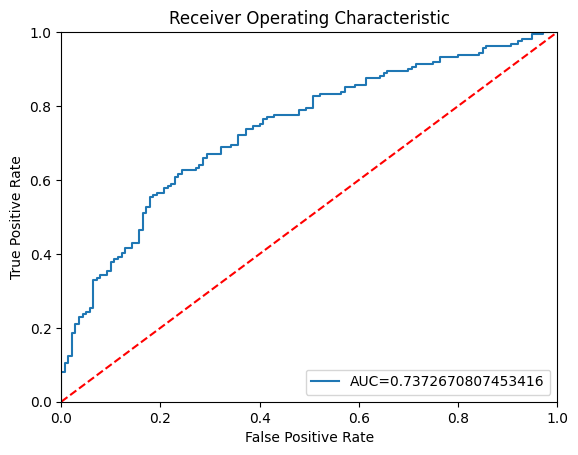

In [357]:
# Vẽ đường cong ROC
from sklearn import metrics
import matplotlib.pyplot as plt
Y_pred_test_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  Y_pred_test_proba)
AUC = metrics.roc_auc_score(y_test, Y_pred_test_proba)
plt.figure()
plt.plot(fpr, tpr, label = "AUC="+str(AUC))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#create ROC curve
# plt.plot(fpr,tpr,label="AUC="+str(AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.savefig('Log_ROC')
plt.legend(loc=4)
plt.show()

In [358]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:, 1])


In [359]:
#  Đối với AUC,sử dụng hàm python roc_auc_score() cho ROC
lotgit_roc_auc1 = roc_auc_score(y_train, model.predict(X_train))

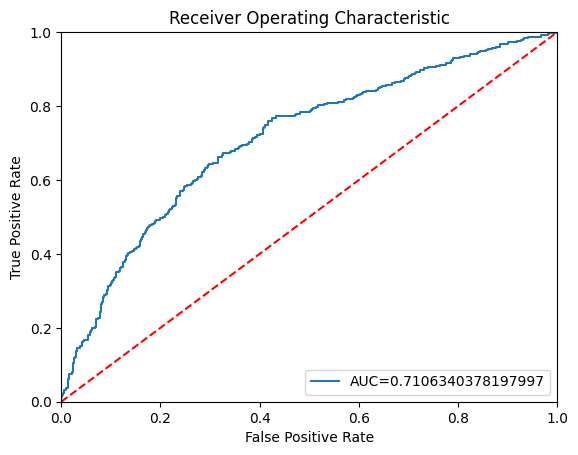

In [360]:
# Vẽ đường cong ROC
from sklearn import metrics
import matplotlib.pyplot as plt
Y_pred_train_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  Y_pred_train_proba)
AUC = metrics.roc_auc_score(y_train, Y_pred_train_proba)
plt.figure()
plt.plot(fpr, tpr, label = "AUC="+str(AUC))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

#create ROC curve
# plt.plot(fpr,tpr,label="AUC="+str(AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.savefig('Log_ROC')
plt.legend(loc=4)
plt.show()